<a href="https://colab.research.google.com/github/MattheusMatos/Data_Science_Projects/blob/master/Airbnb_Data_Analysis_Mexico_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - Mexico City
*by: [Mattheus Matos](https://www.linkedin.com/in/matosmattheus/)*

---

Hello, World!

Or it would be better say: "*Hola, Mundo!*" ?

Just because **in this notebook, we're going to analyse Mexico City's Airbnb Data and take a look what insights we can get from this raw data.**

But, you might be wondering: Why Mexico? More specifically, Mexico City? Why AirBnb?  Alright, let me explain it. First things first.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

[Airbnb](https://www.airbnb.com.br/) Air, bed and breakfast) is an online community service for people to announce, find out and book accommodations. Founded in 2008 by Brian Chesky, Joe Gebbia and Nathan Blecharczyk, since its early years it was a success, it became one of the most important platforms of accommodation offers in the whole world. Nowadays, Airbnb is present in more than 80 thousand cities and more than 190 countries, it has become the ideal solution for those who are looking for a place to stay (house, room, apartment, castle, igloo, houseboat, hut, treehouse - believe it, there are more options than you can imagine)  during a work trip or vacation. 



<center><img alt="Bandeira do México" width="10%" src="https://imagepng.org/wp-content/uploads/2017/10/bandeira-mexico.png"></center>

Now, let's talk about Mexico. I traveled to this beautiful country, I spent about 15 days out there and I have to say: Mexico is really amazing. I don't know if it is its tasty food (tacos, nachos, chilaquiles, tostadas, enchilada, etc) and tequila; its vibrant rhythm, songs, and dance; its amazing culture, handicrafts, and colors, its greats personalities such as Frida Khalo, Maria Felix, Luis Miguel, Roberto Bolaños, El Santo and many others; or its beautiful and stunning places (beaches, ruins, mountains, *cenotes*, etc); all of these things are perfectly described by Luis Miguel in ["México en la piel"](https://www.youtube.com/watch?v=Aq4CccUx3-Q), including I'm listening to it while I'm writing this notebook. Really, that trip was unforgettable.

Talking specifically about Mexico City (our object of study in this analysis), it is the capital and largest city of Mexico and the most populous city in the American continent and the second in the whole world, behind only Tokyo. Mexico City is also one of the most important cultural and financial centers in the world, besides its tourist side. 


## Getting the Data

One of the best things and initiatives of big companies like Airbnb, is to make data from some cities available on their website: [Inside Airbnb](http://insideairbnb.com/get-the-data.html) (every data used on this analysis were obtained in this website). In other words, making them public, so that anyone can download this huge amount of data and help in the development of projects and solutions by Data Science.

We're going to download only this following file:

* `listings.csv` - Summary information and metrics for listings in Mexico City (good for visualisations).


In [0]:
# importing some libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importing the file listings.csv to a DataFrame

airbnb = pd.read_csv("http://data.insideairbnb.com/mexico/df/mexico-city/2020-04-23/visualisations/listings.csv")


## Data analysis
Right here, in this stage, we're going to have an early looking of our DataFrame and we'll be able to see how the dataset is structured.

**Dictionary of Variables**

* `id` - property id number
* `name` - announced property name
* `host_id` - host id number
* `host_name` - host name
* `neighbourhood_group` - this column contain only **NaN**<sup>**1**</sup> values
* `neighbourhood` - neighbourhood name
* `latitude` - property latitude coordinate
* `longitude` - property longitude coordinate
* `room_type` - room type offered
* `price` - property rent price
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of property reviews
* `last_review` - last review date
* `reviews_per_month` - amount of monthly reviews
* `calculated_host_listings_count` - amount of properties of the same host
* `availability_365` - disponibility in a 365 days period

<sub>[1](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) **NaN**, standing for **Not a Number**, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable.<sub>


Before starting our complete analysis, let's take a look in the head of our dataset:

In [0]:
# showing the 5 first inputs
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,2516,1,57,2019-05-27,0.48,8,357
1,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,4916,1,0,NaN,NaN,2,358
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43937,-99.15614,Entire home/apt,909,4,60,2019-07-24,2.02,2,0
3,58955,Entire beautiful duplex in la Roma,282620,Nat,NaN,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,2076,3,42,2020-01-31,0.41,1,61
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.41259,-99.17959,Private room,1466,2,52,2019-11-03,1.72,2,172


### **Q1. How many attributes (variables) and how many inputs does our dataset have? What are the types of variables?**

Let's continue, now seeing how many inputs (rows and columns) we have in our dataset and also the types of each attribute (column).

In [0]:
# identifying dataset inputs

print('Rows: {}'.format(airbnb.shape[0]))
print('Columns: {}\n'.format(airbnb.shape[1]))

# identifying attributes types
display(airbnb.dtypes)

Rows: 21801
Columns: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

We can verify that our dataset has 21801 rows and 16 columns. Note this is a summarized dataset, however, if you want to work with a bigger and more complete dataset, on the same page we downloaded `listings.csv`, in Mexico City session, you'll find a dataset named `listings.csv.gz`.

Talking about the types of its attributes, we see that there are many integer and floating values; and some string values too.

### **Q2. What is the percentage of missing values in the data set?**

Missing values are a problem! The quality of a dataset is directly related to its missing values. That is, the less missing values we have, it's better to work with the dataset, enabling a more competent and satisfactory analysis. Then, it's important to know if these missing values are significant in comparison with the total inputs.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(airbnb.isnull().sum()/airbnb.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.220999
last_review                       0.220999
name                              0.000367
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Dividing the sum of the missing values ​​by the number of rows, we find the percentage of missing values. Organizing them downwardly, we note:

* The `neighbourhood_group`column has 100% of missing values.
* Both `reviews_per_month` and `last_review`columns has about 22% of missing values.

### **Q3. What are the variables distribution types?** 

For identifying the distribution of the variables, we're going to plot a histogram

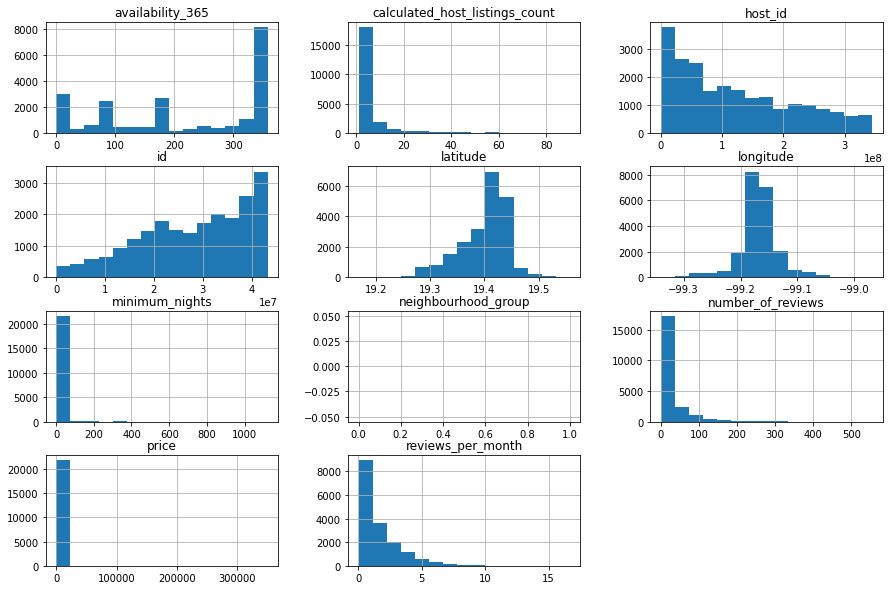

In [0]:
# plotting the histogram (only from the numerical values)

airbnb.hist(bins=15,figsize=(15,10));

In [0]:
# looking for outliers

airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21801.000000,21801.000000,21801.000000,16983.000000,21801.000000,21801.000000
mean,1291.454520,4.023990,24.576487,1.606652,5.081739,214.674327
std,4311.306854,21.921845,42.305977,1.692000,9.776301,135.807309
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,393.000000,1.000000,1.000000,0.380000,1.000000,82.000000
50%,737.000000,2.000000,7.000000,1.020000,2.000000,227.000000
75%,1343.000000,2.000000,29.000000,2.290000,4.000000,357.000000
max,350001.000000,1122.000000,555.000000,16.680000,90.000000,358.000000


We have a lot of information right here. For example, we can note some outliers: 

* The minimum `price`  of rent in Mexico City is 0.00 MXN. It doesn't make sense at all. No one would put its accommodation for booking for free. Still, on `price`, we have the maximum value is about 350000.00 MXN, this is a price of a good car or a regular house, anyone wouldn't pay this price for one night.

* The minimum number of nights (`minimum_nights`) has a maximum value equals to 1122 nights, that is, you only can book this accommodation if you stay for at least 1122 nights, this is more than 3 years. You can't travel for a beautiful weekend and book this accommodation or this is definitely an outlier.

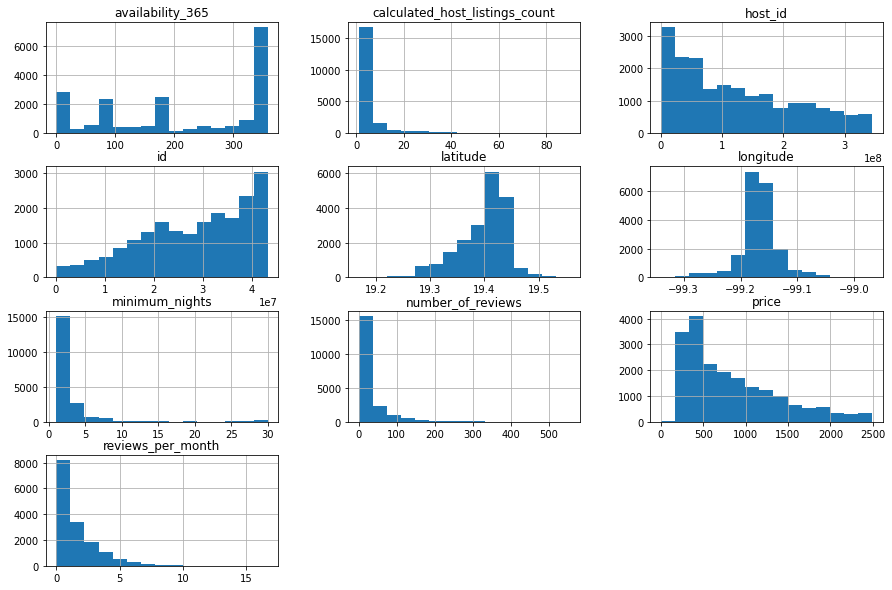

In [0]:
# deleting the overliers values

airbnb_clean = airbnb.copy()
airbnb_clean.drop(airbnb_clean[airbnb_clean.price > 2500].index, axis=0, inplace=True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.minimum_nights > 30].index, axis=0, inplace=True)

# dropping the column 'neighbourhood_group', because it's empty 

airbnb_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotting new histograms from our new DataFrame

airbnb_clean.hist(bins=15, figsize=(15,10));



After removing some of the DataFrame outliers, we created a new DataFrame (`airbnb_clean`), where we can verify more clearly both `price` and `minimum_nights` distribution.

The possibility of removing these outliers is very good for us, as it helps a lot in verifying our data set, allowing a more accurate analysis.

### **Q4. What is the average rental price?**

Let's check the average price of Airbnb accommodation in Mexico City:




In [0]:
# checking the mean of the column "price"

print('Average price = {}'.format(airbnb_clean['price'].mean()))

Average price = 832.3649934217184


So, if you want to travel to Mexico City, be ready for paying an average price of 833.00 MXN a night.

### **Q4. What is the correlation between the variables?**

In the broadest sense of the word, correlation is a relation or similarities between two things, but we using to refer how close two variables are to having a linear relationship with each other (Pearson's correlation).

In [0]:
# creating a correlation array

corr = airbnb_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# showing the correlation array
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021005,0.137562,0.105233,0.143546,0.043979
minimum_nights,-0.021005,1.000000,-0.078823,-0.101475,-0.020809,-0.023385
number_of_reviews,0.137562,-0.078823,1.000000,0.677309,0.064310,0.090797
reviews_per_month,0.105233,-0.101475,0.677309,1.000000,0.157108,0.083582
calculated_host_listings_count,0.143546,-0.020809,0.064310,0.157108,1.000000,0.106745
availability_365,0.043979,-0.023385,0.090797,0.083582,0.106745,1.000000


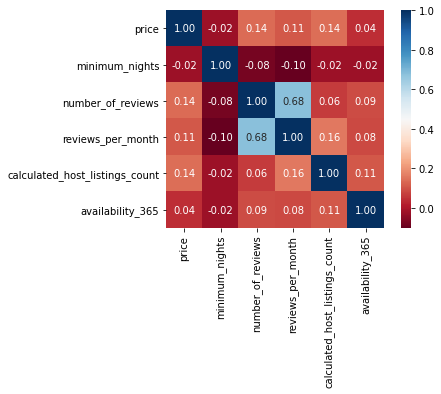

In [0]:
# plotting a correlation heatmap

sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Correlation is a number between -1 and 1. The closer that our variable (in this case: corr) is to 1 or -1 means the correlation will be stronger.

We can verify the strongest correlation in this table/heatmap is between `number_of_reviews` and `reviews_per_month`.

### **Q5. What type of property is most rented on Airbnb?**

As I said in the beginning, Airbnb offers many accommodation options, since a shared room to a fancy castle. What about Mexico City? How's it divided? Let's check it out.

In [0]:
# showing the amount of each room type

airbnb_clean.room_type.value_counts()

Private room       9724
Entire home/apt    9416
Shared room         361
Hotel room          261
Name: room_type, dtype: int64

In [0]:
# showing the percentage of each room type available 
airbnb_clean.room_type.value_counts()/airbnb_clean.shape[0]

Private room       0.492055
Entire home/apt    0.476470
Shared room        0.018267
Hotel room         0.013207
Name: room_type, dtype: float64

We can see that entire houses/apartments and private rooms are the options with more possibilities for rent. The Private room composes approximately 49% (9724) of all accommodations, followed by Entire home/apt with around 47% (9416), these two accommodation options compose more than 96% of room options in Mexico City. The Shared room and Hotel room complete the list with approximately 2% each.

### **Q6. What is the most expensive area in Mexico City?**

When I traveled to Mexico City, I rent an entire apartment in *Coyoacán*, because it's next to Frida Khalo Museum, a place full of culture and history, surely I needed to meet.

But let's see if *Coyoacán* is on the top 10 list of the most expensive areas in Mexico City.


In [0]:
# neighbourhood prices

airbnb_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]



neighbourhood
Miguel Hidalgo            1026.586698
Cuajimalpa de Morelos     1016.506143
Cuauhtémoc                 962.565350
Álvaro Obregón             769.901379
Benito Juárez              694.659691
La Magdalena Contreras     686.282895
Coyoacán                   665.436364
Venustiano Carranza        597.656818
Milpa Alta                 583.000000
Xochimilco                 549.471545
Name: price, dtype: float64

The most expensive area in Mexico City is *Miguel Hidalgo* with an average price of 1027.00 MXN, this is understandable, it's a safety area, full of beautiful places, such: Botanical Garden, Kurimanzutto, Dolores Cárcamo Museum and many others. Completing the top 3 are *Cuajimalpa de Morelos* and *Cuauhtémoc*, with 1017.00 MXN and 963.00 MXN, respectively.

*Coyoacán* is only in the seventh position, with an average price of 665.00 MXN

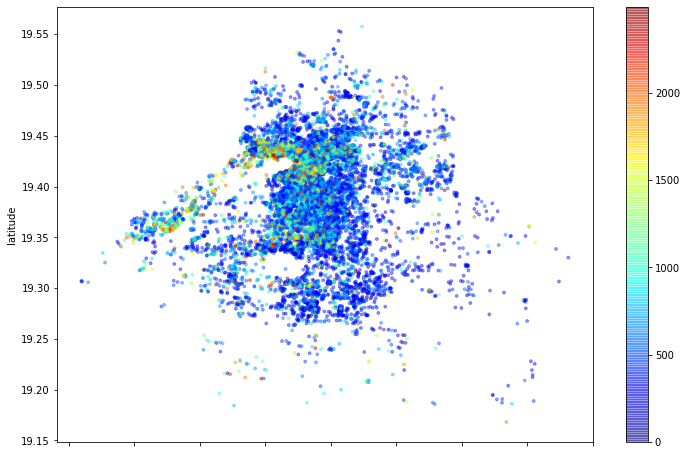

In [0]:
# plotting properties by latitude-longitude

airbnb_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=airbnb_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


Considering x = `longitude` and y = `latitude` , we can, literally, see each one of the Airbnb places to stay in Mexico City by its `price` .

### **Q7. What is the average number of minimum nights (minimum_nights)?**

We're almost finishing our trip trough the Airbnb Mexico City Data, we already know about prices, neighbourhood, room types,  now we're going to see how long at least we need to stay in a place in Mexico City.

In [0]:
# average minimum_nights number

print('Average of minimum nights = {}'.format(airbnb_clean.minimum_nights.mean()))

Average of minimum nights = 2.6982086833316465


If you are planning your trip to Mexico City, you must be free for at least 3 days. But I recommend that you spend as much time as possible in this wonderful country. 

## Conclusions


We finally reached the end of our trip through Mexico City, based on the data analyzed, and with some line of codes, we can see almost everything about the Airbnb places to stay in Mexico City. 

We verified many outliers that can modify the results, but when we remove them, we can work easily and a clearer way.

Note this is a summarized dataset that allows us to have a superficial vision and analysis.

That's all, folks! See you!

Or it would be better say:

*!Eso es todo, wey! Hasta pronto!*

